**Research Proposal: Participatory Modeling for Societal Complexity in
Healthcare**

By Heider Jeffer

**Hello and welcome!**


We're excited to share our work on participatory modeling for societal complexity in healthcare. 

**Explore and engage with our resources below:**

* Discover Our Project: Learn about our approach and research on <a href="https://github.com/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare">GitHub</a>.

* Try It Out: Experiment with our simulation through this interactive <a href="https://colab.research.google.com/drive/105ePLc-icF1qyzUB-VX9SQ446raubosx?authuser=2">Google Colab notebook</a>.

* Explore the Code: Dive into the details of our simulation by reviewing the <a href="https://github.com/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/Healthcare%20Participatory%20Model%20Simulation/Healthcare%20Participatory%20Model%20Simulation.ipynb">source code</a>.
*  Here you can find: <a href="https://github.com/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/documents/Research%20Questions.pdf">How we use Python to answer the Research Questions</a>

* In the appendix you can find: <a href="https://github.com/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/documents/appendix%20.pdf"> Formula, Numerical Example, Simulation Steps that we used in Python to answer the research questions</a>

* Here you can find <a href="https://github.com/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/documents/Requirements.txt"> Software Requirements</a>



We'd love for you to explore, experiment, and share your thoughts with us!





**Introduction**

The increasing complexity of healthcare systems, particularly in
addressing aging-related challenges, calls for innovative,
multi-disciplinary approaches to develop sustainable and effective
policies. Computational simulations of real-world phenomena, known as
*in silico* models, provide unparalleled opportunities to optimize
healthcare processes by understanding and predicting system dynamics.
However, deploying these models requires a nuanced understanding of
societal complexity, including stakeholder dynamics, institutional
barriers, and incentive structures.

This research aims to bridge the gap between advanced computational
modeling and real-world healthcare applications by leveraging
**participatory modeling**. This collaborative approach engages diverse
stakeholders to co-develop models that reflect societal and systemic
nuances, ensuring both accuracy and usability.

**Research Objectives**

1.  **Develop a Participatory Modeling Framework**\
    Establish a research protocol to capture agency complexities,
    structural hindrances, and incentive dynamics, focusing on
    hospital-level adoption of *in silico* models.

2.  **Model Societal Complexity in Model Deployment**\
    Use System Dynamics Modeling (SDM) and Hidden Markov Models (HMMs)
    to simulate interactions between stakeholders, such as clinicians,
    administrators, and policymakers, to explore:

    -   Barriers to adoption,

    -   Strategies for incentivizing uptake,

    -   Policy implications for healthcare delivery optimization.

3.  **Validate Participatory Methods and Policies**\
    Develop actionable policies through participatory workshops and
    validate outcomes using real-world stakeholder feedback and data.

4.  **Evaluate Impact**\
    Measure the effectiveness of participatory modeling in fostering *in
    silico* model adoption and its effect on healthcare optimization.

**Research Approach**

**Mixed Methods Framework**

This research integrates qualitative and quantitative methodologies to
provide a comprehensive understanding of societal complexities in
healthcare systems. A **concurrent triangulation design** will ensure
that insights from both qualitative and quantitative data collection are
validated and synthesized iteratively.

**1. Literature Review**

-   Conduct a systematic review of participatory modeling and *in
    silico* applications in healthcare.

-   Identify best practices and gaps, providing a foundation for the
    proposed framework.

**2. Stakeholder Engagement**

Each stakeholder plays a distinct yet interconnected role. Effective
engagement in these activities fosters a collaborative and efficient
healthcare environment, improving patient outcomes, staff satisfaction,
and overall system performance.

**1. Patients**

**Types of Engagement Activities:**

-   **Participation in Care:**

    -   Attending medical appointments, follow-ups, or therapy sessions.

    -   Adhering to prescribed medications and treatment plans.

-   **Feedback and Communication:**

    -   Completing patient satisfaction surveys or providing feedback on
        care.

    -   Participating in patient advocacy or support groups.

-   **Health Literacy:**

    -   Engaging in educational workshops about managing chronic
        conditions.

    -   Using patient portals for accessing medical records, test
        results, and messaging healthcare providers.

-   **Preventative Care:**

    -   Participating in health screenings, vaccinations, or wellness
        programs.

    -   Attending fitness or mental health workshops.

**2. Doctors**

**Types of Engagement Activities:**

-   **Direct Care Delivery:**

    -   Providing consultations, diagnoses, and treatments for patients.

    -   Performing surgeries or specialized medical procedures.

-   **Professional Development:**

    -   Attending medical conferences, workshops, or training sessions.

    -   Engaging in continuing medical education (CME) to stay updated
        on best practices.

-   **Collaboration:**

    -   Participating in multidisciplinary team meetings to discuss
        patient care.

    -   Mentoring medical students or residents.

-   **Research and Advocacy:**

    -   Conducting clinical trials or contributing to medical research.

    -   Advocating for healthcare policy improvements or patient rights.

**3. Nurses**

**Types of Engagement Activities:**

-   **Patient-Centered Care:**

    -   Educating patients about medications, treatments, and
        post-discharge care.

    -   Monitoring patient conditions and adjusting care plans.

-   **Coordination and Communication:**

    -   Acting as a liaison between patients and doctors to ensure care
        continuity.

    -   Collaborating with other healthcare team members.

-   **Professional Development:**

    -   Attending workshops or obtaining certifications in specialized
        fields (e.g., critical care, geriatrics).

-   **Community Involvement:**

    -   Conducting health promotion activities, such as blood drives or
        vaccination campaigns.

    -   Volunteering for health outreach in underserved areas.

**4. Administrators**

**Types of Engagement Activities:**

-   **Operational Oversight:**

    -   Managing hospital budgets, staffing, and logistics to ensure
        smooth operation.

    -   Overseeing compliance with healthcare regulations and standards.

-   **Stakeholder Coordination:**

    -   Organizing training programs for healthcare staff.

    -   Facilitating communication between departments and external
        agencies.

-   **Strategic Planning:**

    -   Designing and implementing patient satisfaction and engagement
        initiatives.

    -   Developing long-term plans for improving healthcare delivery and
        efficiency.

-   **Data-Driven Decision-Making:**

    -   Analyzing metrics on patient outcomes and staff performance to
        inform improvements.

    -   Implementing health information technology (HIT) systems, like
        electronic health records (EHR).

**Qualitative Data Collection**

-   **Workshops**: Host participatory sessions with stakeholders (e.g.,
    clinicians, patients, administrators) to explore challenges,
    motivations, and perceptions related to *in silico* model adoption.

-   **Interviews**: Conduct semi-structured interviews to gather
    in-depth insights into stakeholders' behaviors, concerns, and
    expectations.

-   **Document Analysis**: Analyze policies, healthcare guidelines, and
    organizational documents to identify institutional barriers.

**Quantitative Data Collection**

-   **Surveys**: Distribute structured questionnaires to measure
    attitudes, priorities, and the prevalence of identified barriers.

-   **Observational Data**: Collect real-world data on current
    workflows, resource allocations, and decision-making processes
    within healthcare systems.

**3. Model Development**

**System Dynamics Modeling (SDM)**

-   Use SDM to simulate interactions among stakeholders and visualize
    systemic feedback loops.

-   Quantify the impact of proposed policies and strategies on model
    adoption.

**Hidden Markov Models (HMMs)**

-   Incorporate HMMs to account for behavioral uncertainties and
    transition probabilities in stakeholder decision-making processes.

**Integration of Qualitative Insights**

-   Map qualitative findings (e.g., resistance themes, collaboration
    patterns) into model parameters to ensure they reflect real-world
    complexity.

**4. Validation and Refinement**

-   **Participatory Feedback**: Present preliminary models to
    stakeholders in workshops and incorporate their feedback.

-   **Case Study Application**: Test models against real-world scenarios
    at Karolinska University Hospital to refine their accuracy.

-   **Triangulated Analysis**: Compare model outputs with qualitative
    narratives and survey results to validate findings.

**5. Policy Recommendations**

-   Develop evidence-based policies informed by model simulations and
    stakeholder insights.

-   Pilot these recommendations during the planned secondment at VU
    Amsterdam and refine based on further feedback.

**Expected Findings**

1.  **Framework Development**

    -   A validated participatory modeling framework tailored to the
        complexities of healthcare systems.

    -   Practical guidelines for integrating stakeholder perspectives
        into computational models.

2.  **Insights into Societal Complexity**

    -   Quantitative identification of key barriers (e.g., adoption
        rates, resource constraints).

    -   Qualitative understanding of stakeholder dynamics and
        institutional challenges.

3.  **Policy Effectiveness**

    -   Evidence-based strategies to incentivize model uptake.

    -   Improved hospital-level outcomes through optimized resource
        allocation and stakeholder collaboration.

4.  **Validation of Participatory Modeling**

    -   Enhanced stakeholder alignment and ownership of *in silico*
        models.

    -   Greater usability and acceptance of proposed policies, leading
        to broader implementation.

**Year Planning**

**Year 1: Foundations**

-   Conduct literature review.

-   Initiate stakeholder engagement through interviews and surveys.

-   Develop a preliminary SDM framework.

**Year 2: Model Refinement**

-   Integrate qualitative findings into SDMs.

-   Incorporate HMMs to address uncertainties.

-   Conduct participatory workshops to validate the models.

**Year 3: Validation**

-   Apply models to case studies at Karolinska University Hospital.

-   Refine policies based on validation feedback.

-   Test recommendations at VU Amsterdam.

**Year 4: Dissemination**

-   Publish findings in peer-reviewed journals.

-   Finalize the participatory modeling framework.

-   Complete and defend the doctoral thesis.

**Significance**

This research addresses the challenges of deploying *in silico* models
for healthy aging by incorporating societal complexity through
participatory methods. By combining qualitative and quantitative data
collection and analysis, the project ensures that these models are not
only technically sound but also socially viable and impactful. The
results have the potential to revolutionize how healthcare organizations
adopt computational tools to enhance patient outcomes and operational
efficiency.

"I authorize the processing of my personal data pursuant to art. 13 of
Legislative Decree no. 196 of 30 June 2003 - \"Personal Data Protection
Code\" and art. 13 of GDPR 679/16 - \"European Regulation on the
Protection of Personal Data\".



Heider Jeffer

26th November 2024


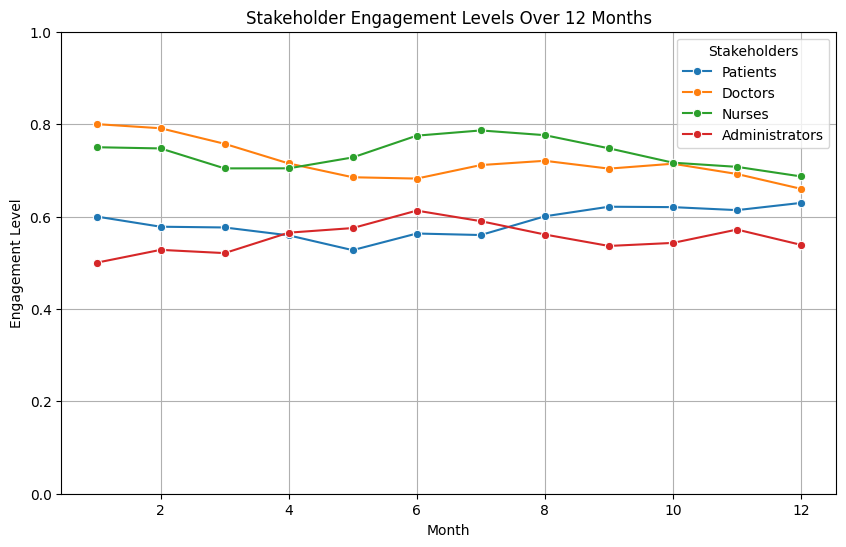

Patients Activities:
 - Participation in Care
 - Feedback and Communication
 - Health Literacy
 - Preventative Care

Doctors Activities:
 - Direct Care Delivery
 - Professional Development
 - Collaboration
 - Research and Advocacy

Nurses Activities:
 - Patient-Centered Care
 - Coordination and Communication
 - Professional Development
 - Community Involvement

Administrators Activities:
 - Operational Oversight
 - Stakeholder Coordination
 - Strategic Planning
 - Data-Driven Decision-Making

Average Engagement Levels by Stakeholder:
Stakeholder
Administrators    0.553513
Doctors           0.719368
Nurses            0.735804
Patients          0.587433
Name: Engagement, dtype: float64


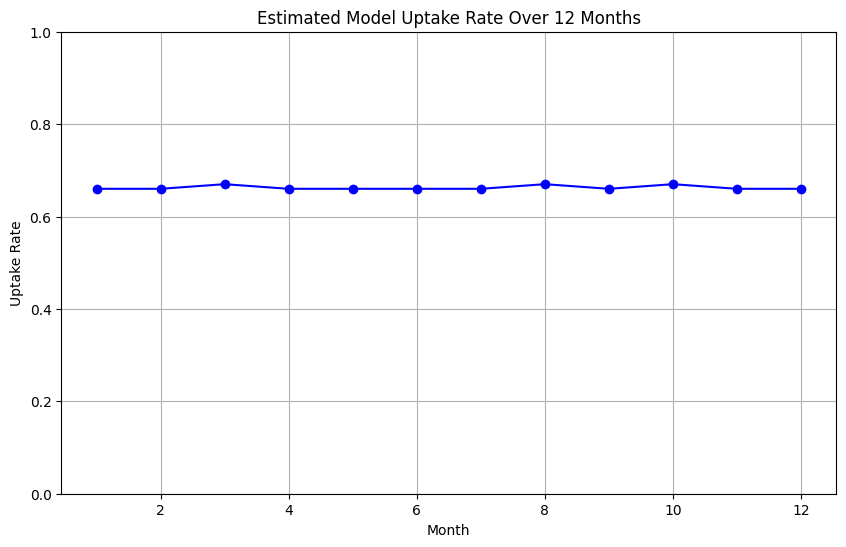

In [1]:
# Updated Code with Engagement Activities
# Healthcare Participatory Model Simulation
# The code is expandable by design 
# Developed using Python by Heider Jeffer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders and their engagement levels, along with types of activities
stakeholders = {
    'Patients': {
        'base_engagement': 0.6,
        'activities': [
            'Participation in Care',
            'Feedback and Communication',
            'Health Literacy',
            'Preventative Care'
        ]
    },
    'Doctors': {
        'base_engagement': 0.8,
        'activities': [
            'Direct Care Delivery',
            'Professional Development',
            'Collaboration',
            'Research and Advocacy'
        ]
    },
    'Nurses': {
        'base_engagement': 0.75,
        'activities': [
            'Patient-Centered Care',
            'Coordination and Communication',
            'Professional Development',
            'Community Involvement'
        ]
    },
    'Administrators': {
        'base_engagement': 0.5,
        'activities': [
            'Operational Oversight',
            'Stakeholder Coordination',
            'Strategic Planning',
            'Data-Driven Decision-Making'
        ]
    }
}

# Function to simulate stakeholder engagement over time
def simulate_stakeholder_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate the engagement levels of stakeholders over time."""
    engagement_over_time = {}
    for stakeholder, data in stakeholders.items():
        base_engagement = data['base_engagement']
        monthly_engagement = [base_engagement]  # Start with the base engagement level
        for _ in range(1, months):
            # Simulate fluctuations in engagement levels due to external factors
            change = np.random.uniform(-fluctuation, fluctuation)
            new_engagement = max(0, min(1, monthly_engagement[-1] + change))
            monthly_engagement.append(new_engagement)
        engagement_over_time[stakeholder] = {
            'engagement': monthly_engagement,
            'activities': data['activities']
        }
    return engagement_over_time

# Simulate engagement levels for 12 months
engagement_data = simulate_stakeholder_engagement(stakeholders)

# Convert to DataFrame for analysis
df_list = []
for stakeholder, data in engagement_data.items():
    for month, engagement in enumerate(data['engagement'], start=1):
        df_list.append({
            'Stakeholder': stakeholder,
            'Month': month,
            'Engagement': engagement,
            'Activities': ', '.join(data['activities'])
        })

df_engagement = pd.DataFrame(df_list)

# Visualization of Stakeholder Engagement Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_engagement, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title("Stakeholder Engagement Levels Over 12 Months")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(title="Stakeholders")
plt.grid()
plt.show()

# Display Engagement Activities Summary
for stakeholder, data in stakeholders.items():
    print(f"{stakeholder} Activities:")
    for activity in data['activities']:
        print(f" - {activity}")
    print()

# Analyzing Average Engagement Levels
average_engagement = df_engagement.groupby('Stakeholder')['Engagement'].mean()
print("Average Engagement Levels by Stakeholder:")
print(average_engagement)

# System Dynamics Simulation: Impact of Engagement on Model Uptake Rate
def model_uptake_rate(engagement_dict):
    """Estimate uptake rate based on engagement levels."""
    uptake_rate = sum(data['base_engagement'] for data in engagement_dict.values()) / len(engagement_dict)
    return round(uptake_rate, 2)

# Calculate uptake rate over 12 months and simulate feedback loop
monthly_uptake_rates = [model_uptake_rate(stakeholders)]
for month in range(1, 12):
    updated_engagement = {
        k: {'base_engagement': max(0, min(1, v['base_engagement'] + np.random.uniform(-0.02, 0.02))),
            'activities': v['activities']}
        for k, v in stakeholders.items()
    }
    monthly_uptake_rates.append(model_uptake_rate(updated_engagement))

# Visualize the model uptake rates over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 13), monthly_uptake_rates, marker="o", color='blue')
plt.title("Estimated Model Uptake Rate Over 12 Months")
plt.xlabel("Month")
plt.ylabel("Uptake Rate")
plt.ylim(0, 1)
plt.grid()
plt.show()



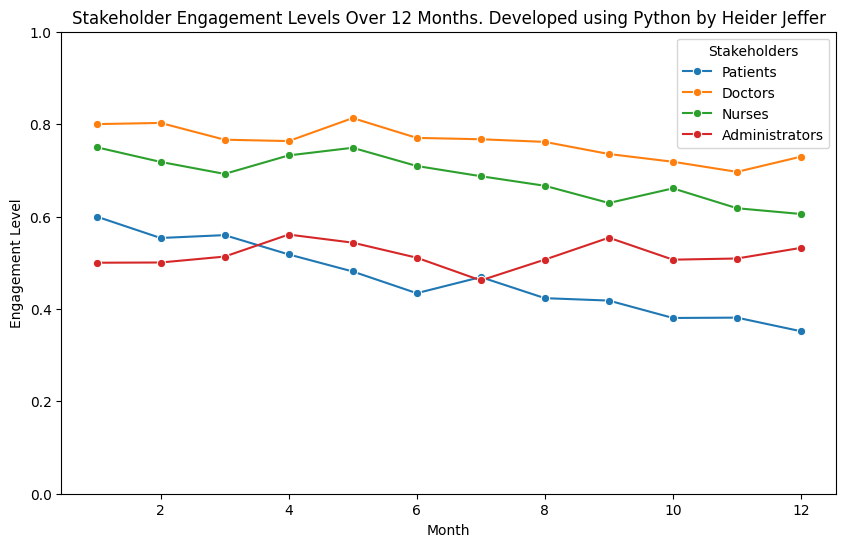

Average Engagement Levels by Stakeholder:
Stakeholder
Administrators    0.516636
Doctors           0.760360
Nurses            0.684859
Patients          0.464150
Name: Engagement, dtype: float64


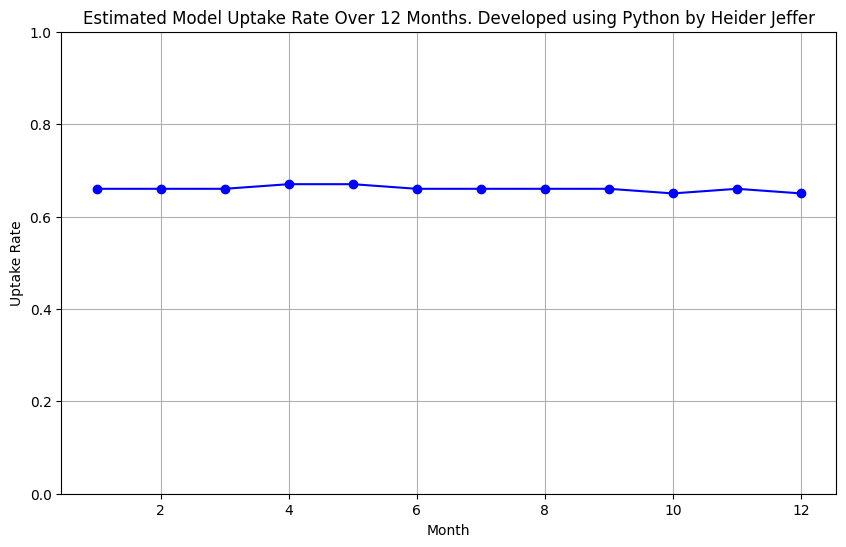

In [2]:
# Healthcare Participatory Model Simulation
# The code is expandable by design 
# Developed using Python by Heider Jeffer


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of healthcare stakeholders and their engagement levels
stakeholders = ['Patients', 'Doctors', 'Nurses', 'Administrators']
engagement_levels = {
    'Patients': 0.6,       # e.g., 60% engaged
    'Doctors': 0.8,        # e.g., 80% engaged
    'Nurses': 0.75,        # e.g., 75% engaged
    'Administrators': 0.5  # e.g., 50% engaged
}

# Function to simulate and visualize stakeholder engagement over time
def simulate_stakeholder_engagement(initial_engagement, months=12, fluctuation=0.05):
    """Simulate the engagement levels of stakeholders over time."""
    engagement_over_time = {}
    for stakeholder, base_engagement in initial_engagement.items():
        monthly_engagement = [base_engagement]  # Start with the base engagement level
        for _ in range(1, months):
            # Simulate fluctuations in engagement levels due to external factors
            change = np.random.uniform(-fluctuation, fluctuation)
            new_engagement = max(0, min(1, monthly_engagement[-1] + change))
            monthly_engagement.append(new_engagement)
        engagement_over_time[stakeholder] = monthly_engagement
    return engagement_over_time

# Simulate engagement levels for 12 months
engagement_data = simulate_stakeholder_engagement(engagement_levels)

# Convert to DataFrame for analysis
df_engagement = pd.DataFrame(engagement_data)
df_engagement['Month'] = np.arange(1, 13)
df_engagement = df_engagement.melt(id_vars='Month', var_name='Stakeholder', value_name='Engagement')

# Visualization of Stakeholder Engagement Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_engagement, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title("Stakeholder Engagement Levels Over 12 Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(title="Stakeholders")
plt.show()

# Analyzing Average Engagement Levels
average_engagement = df_engagement.groupby('Stakeholder')['Engagement'].mean()
print("Average Engagement Levels by Stakeholder:")
print(average_engagement)

# System Dynamics Simulation: Impact of Engagement on Model Uptake Rate
# Assuming higher engagement results in increased uptake
def model_uptake_rate(engagement_dict):
    """Estimate uptake rate based on engagement levels."""
    uptake_rate = sum(engagement_dict.values()) / len(engagement_dict)
    return round(uptake_rate, 2)

# Calculate uptake rate over 12 months and simulate feedback loop for policy-making insights
monthly_uptake_rates = [model_uptake_rate(engagement_levels)]
for month in range(1, 12):
    updated_engagement = {k: v + np.random.uniform(-0.02, 0.02) for k, v in engagement_levels.items()}
    monthly_uptake_rates.append(model_uptake_rate(updated_engagement))

# Visualize the model uptake rates over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 13), monthly_uptake_rates, marker="o", color='blue')
plt.title("Estimated Model Uptake Rate Over 12 Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Uptake Rate")
plt.ylim(0, 1)
plt.grid()
plt.show()



C:\Users\313\AppData\Local\Temp\ipykernel_13780\842551955.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Stakeholders")


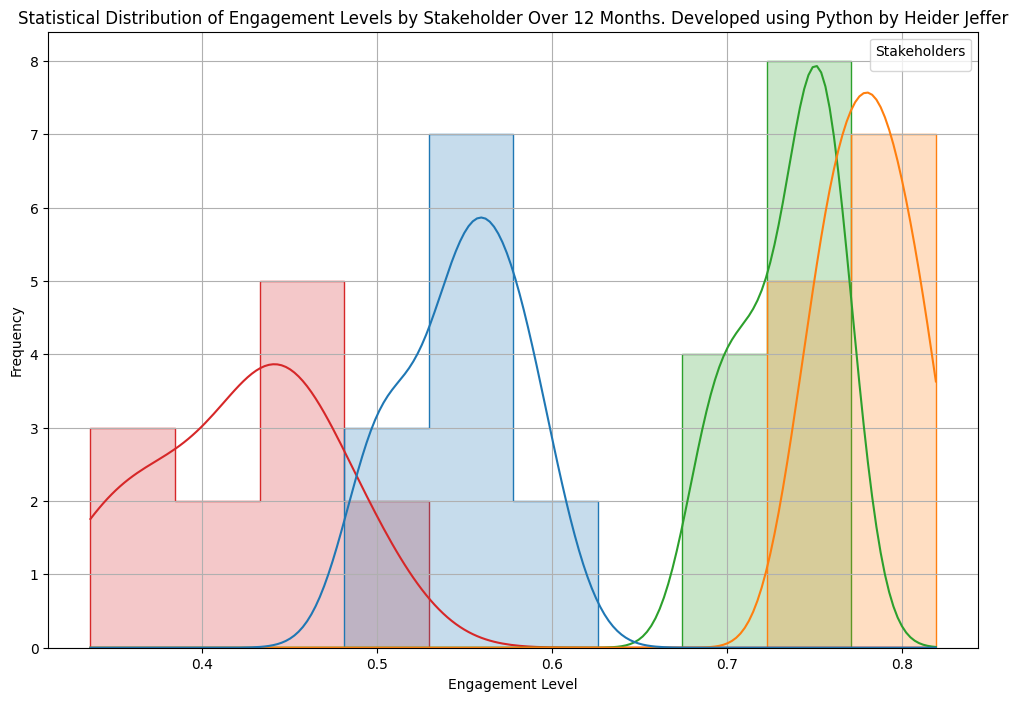

In [2]:
# Here's a statistical distribution plot that shows the simulated engagement levels of
# different stakeholders over a 12-month period. The histogram with KDE (kernel density estimate)
# lines provides insight into the distribution and frequency of engagement levels
# for each stakeholder group (patients, doctors, nurses, and administrators).
# This distribution can help identify patterns, like whether certain stakeholders
# have more stable engagement levels or if any group shows significant fluctuations,
# indicating areas where targeted strategies could improve participation


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholder engagement levels over time
stakeholders = ['Patients', 'Doctors', 'Nurses', 'Administrators']
engagement_levels = {
    'Patients': 0.6,
    'Doctors': 0.8,
    'Nurses': 0.75,
    'Administrators': 0.5
}

# Function to simulate stakeholder engagement over 12 months with fluctuations
def simulate_stakeholder_engagement(initial_engagement, months=12, fluctuation=0.05):
    engagement_over_time = {}
    for stakeholder, base_engagement in initial_engagement.items():
        monthly_engagement = [base_engagement]
        for _ in range(1, months):
            change = np.random.uniform(-fluctuation, fluctuation)
            new_engagement = max(0, min(1, monthly_engagement[-1] + change))
            monthly_engagement.append(new_engagement)
        engagement_over_time[stakeholder] = monthly_engagement
    return engagement_over_time

# Simulate engagement levels for 12 months
engagement_data = simulate_stakeholder_engagement(engagement_levels)

# Convert to DataFrame for analysis
df_engagement = pd.DataFrame(engagement_data)
df_engagement['Month'] = np.arange(1, 13)
df_engagement = df_engagement.melt(id_vars='Month', var_name='Stakeholder', value_name='Engagement')

# Plot distribution of engagement levels for each stakeholder
plt.figure(figsize=(12, 8))
sns.histplot(df_engagement, x='Engagement', hue='Stakeholder', kde=True, bins=10, element="step", palette="tab10")
plt.title("Statistical Distribution of Engagement Levels by Stakeholder Over 12 Months. Developed using Python by Heider Jeffer")
plt.xlabel("Engagement Level")
plt.ylabel("Frequency")
plt.legend(title="Stakeholders")
plt.grid(True)
plt.show()


C:\Users\313\AppData\Local\Temp\ipykernel_15520\1815701989.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Stakeholders", fontsize=12)


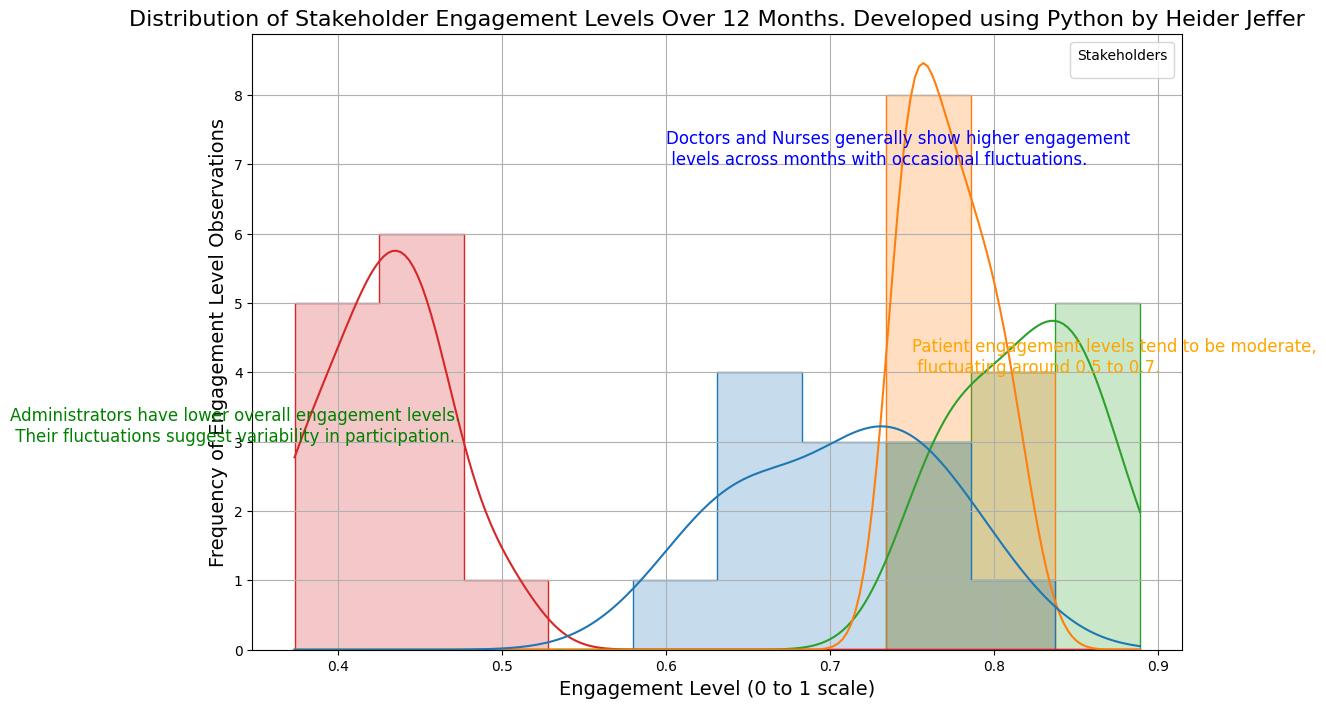

In [5]:
# Plot with explanation and annotations
plt.figure(figsize=(12, 8))
sns.histplot(df_engagement, x='Engagement', hue='Stakeholder', kde=True, bins=10, element="step", palette="tab10")

# Titles and labels with more explanation
plt.title("Distribution of Stakeholder Engagement Levels Over 12 Months. Developed using Python by Heider Jeffer", fontsize=16)
plt.xlabel("Engagement Level (0 to 1 scale)", fontsize=14)
plt.ylabel("Frequency of Engagement Level Observations", fontsize=14)

# Adding detailed explanation on plot
plt.text(0.6, 7, "Doctors and Nurses generally show higher engagement\n levels across months with occasional fluctuations.", color="blue", fontsize=12)
plt.text(0.2, 3, "Administrators have lower overall engagement levels.\n Their fluctuations suggest variability in participation.", color="green", fontsize=12)
plt.text(0.75, 4, "Patient engagement levels tend to be moderate,\n fluctuating around 0.5 to 0.7.", color="orange", fontsize=12)

# Legend and grid
plt.legend(title="Stakeholders", fontsize=12)
plt.grid(True)

plt.show()


C:\Users\313\AppData\Local\Temp\ipykernel_15520\345558786.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Stakeholders", fontsize=12)


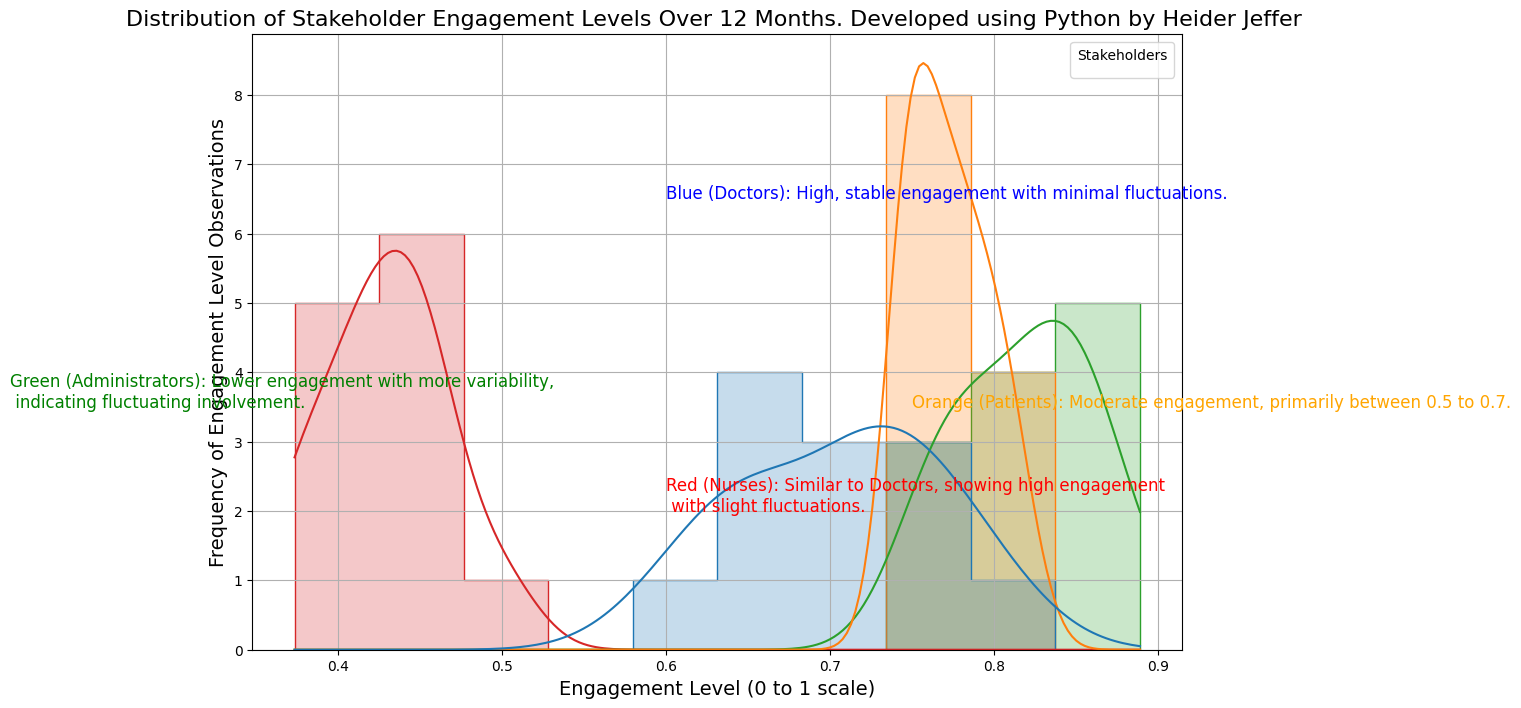

In [6]:
# Plot with detailed explanation and color descriptions
plt.figure(figsize=(12, 8))
sns.histplot(df_engagement, x='Engagement', hue='Stakeholder', kde=True, bins=10, element="step", palette="tab10")

# Titles and labels with more explanation
plt.title("Distribution of Stakeholder Engagement Levels Over 12 Months. Developed using Python by Heider Jeffer ", fontsize=16)
plt.xlabel("Engagement Level (0 to 1 scale)", fontsize=14)
plt.ylabel("Frequency of Engagement Level Observations", fontsize=14)

# Adding detailed color explanations
plt.text(0.6, 6.5, "Blue (Doctors): High, stable engagement with minimal fluctuations.", color="blue", fontsize=12)
plt.text(0.2, 3.5, "Green (Administrators): Lower engagement with more variability,\n indicating fluctuating involvement.", color="green", fontsize=12)
plt.text(0.75, 3.5, "Orange (Patients): Moderate engagement, primarily between 0.5 to 0.7.", color="orange", fontsize=12)
plt.text(0.6, 2, "Red (Nurses): Similar to Doctors, showing high engagement\n with slight fluctuations.", color="red", fontsize=12)

# Legend and grid
plt.legend(title="Stakeholders", fontsize=12)
plt.grid(True)

plt.show()
